In [54]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

from dataPath import DATA_PATH
%matplotlib inline

import matplotlib

matplotlib.rcParams["figure.figsize"] = (20.0, 20.0)
matplotlib.rcParams["image.cmap"] = "gray"

In [55]:
def readImagesAndTimes():
    times = np.array([1 / 30.0, 0.25, 2.5, 15.0], dtype=np.float32)

    filenames = ["img_0.033.jpg", "img_0.25.jpg", "img_2.5.jpg", "img_15.jpg"]
    images = []
    for filename in filenames:
        im = cv2.imread(DATA_PATH + "images/" + filename)
        images.append(im)

    return images, times


In [56]:
images, times = readImagesAndTimes()

In [57]:
alignMTB = cv2.createAlignMTB()
alignMTB.process(images, images)

Text(0, 0.5, 'Calibrated Intensity')

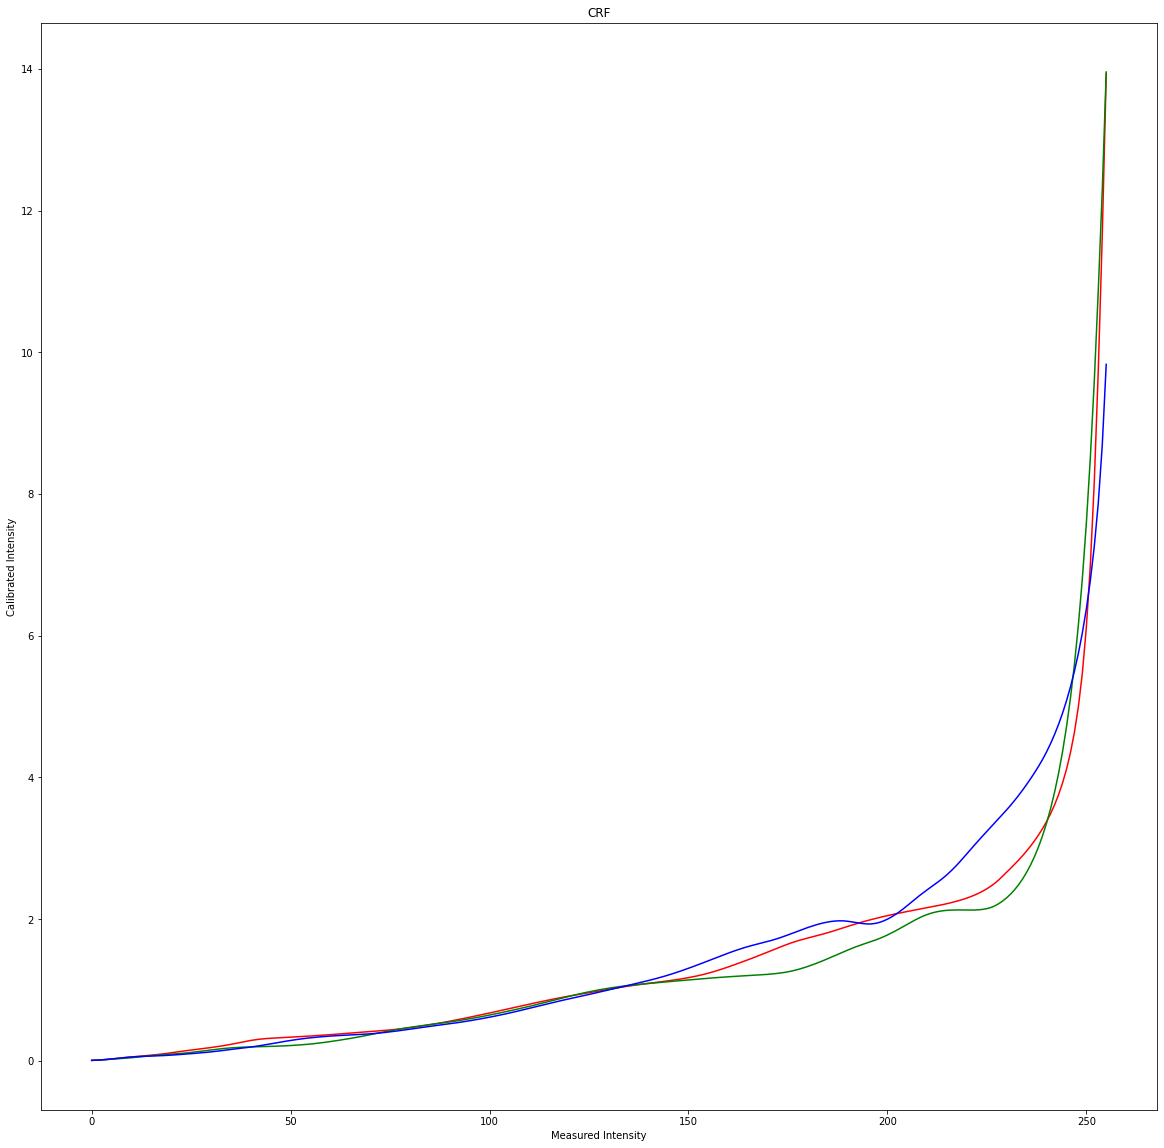

In [58]:
calibrateDebevec = cv2.createCalibrateDebevec()
responseDebevec = calibrateDebevec.process(images, times)

#Plot CRF
x = np.arange(256, dtype=np.uint8)
y = np.squeeze(responseDebevec)

plt.figure(figsize=[20, 20])
plt.plot(x, y[:, 0], 'r', x, y[:, 1], 'g', x, y[:, 2], 'b')
plt.title("CRF")
plt.xlabel("Measured Intensity")
plt.ylabel("Calibrated Intensity")

In [59]:
mergeDebevec = cv2.createMergeDebevec()
hdrDebevec = mergeDebevec.process(images, times, responseDebevec)

cv2.imwrite("hdrDebevec.hdr", hdrDebevec)

True

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


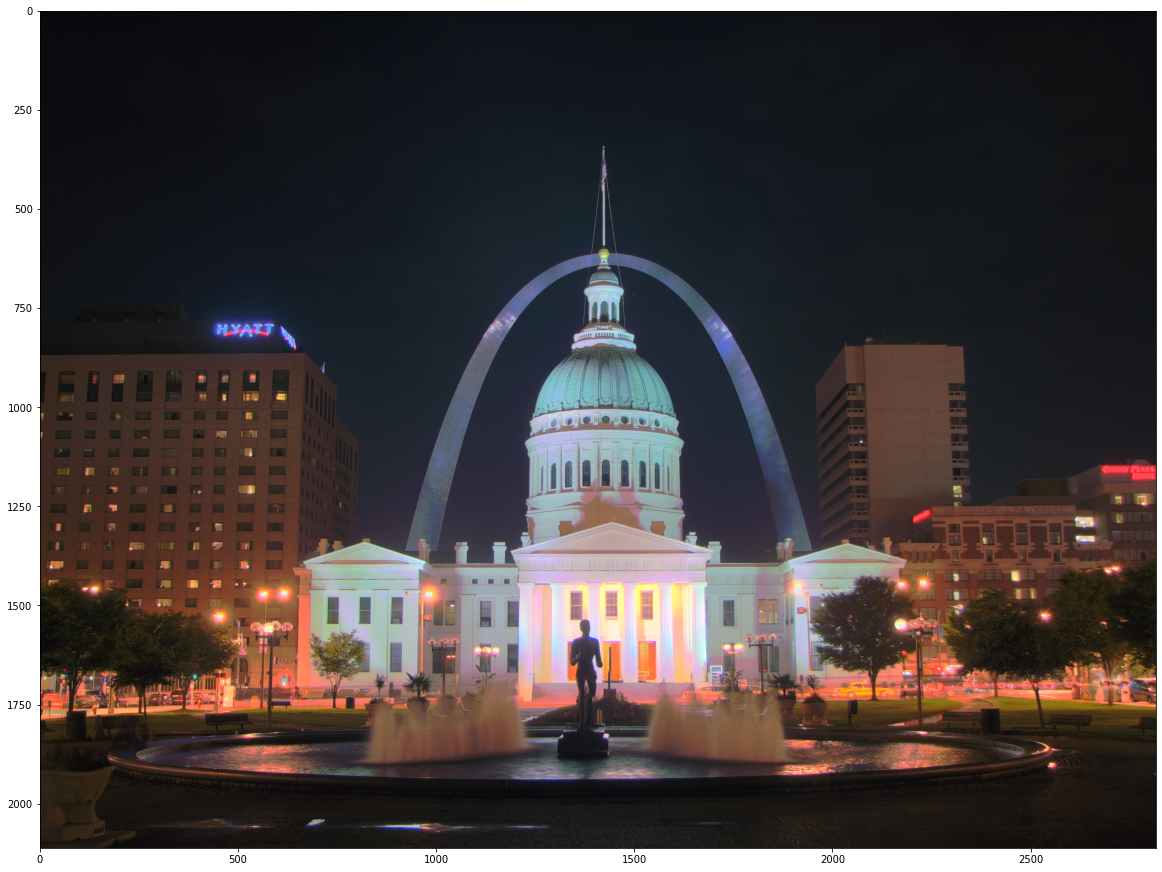

In [60]:
tonemapDrago = cv2.createTonemapDrago(1.0, 0.7)
ldrDrago = tonemapDrago.process(hdrDebevec)
ldrDrago = 3 * ldrDrago
plt.imshow(ldrDrago[...,::-1])

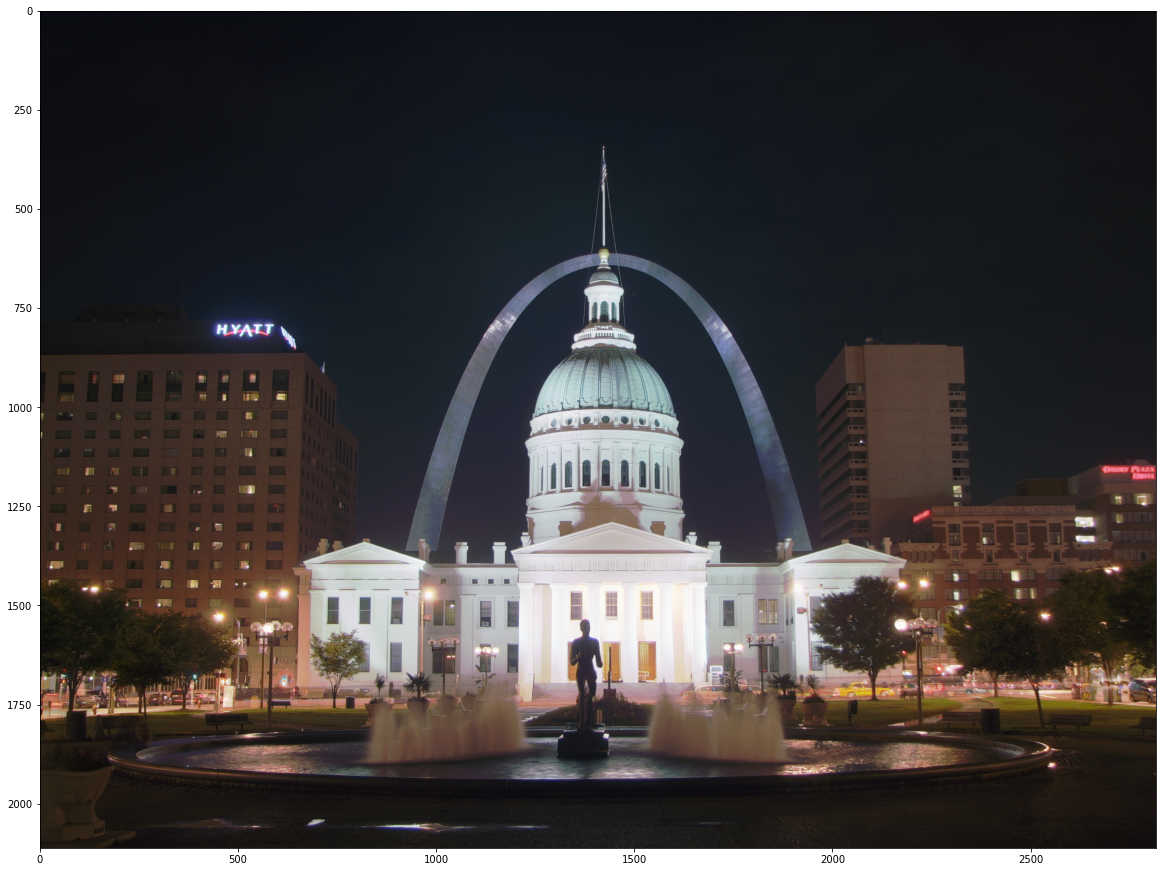

In [61]:
tonemapReinhard = cv2.createTonemapReinhard(1.5,0,0,0)
ldrReinhard = tonemapReinhard.process(hdrDebevec)
plt.imshow(ldrReinhard[...,::-1])

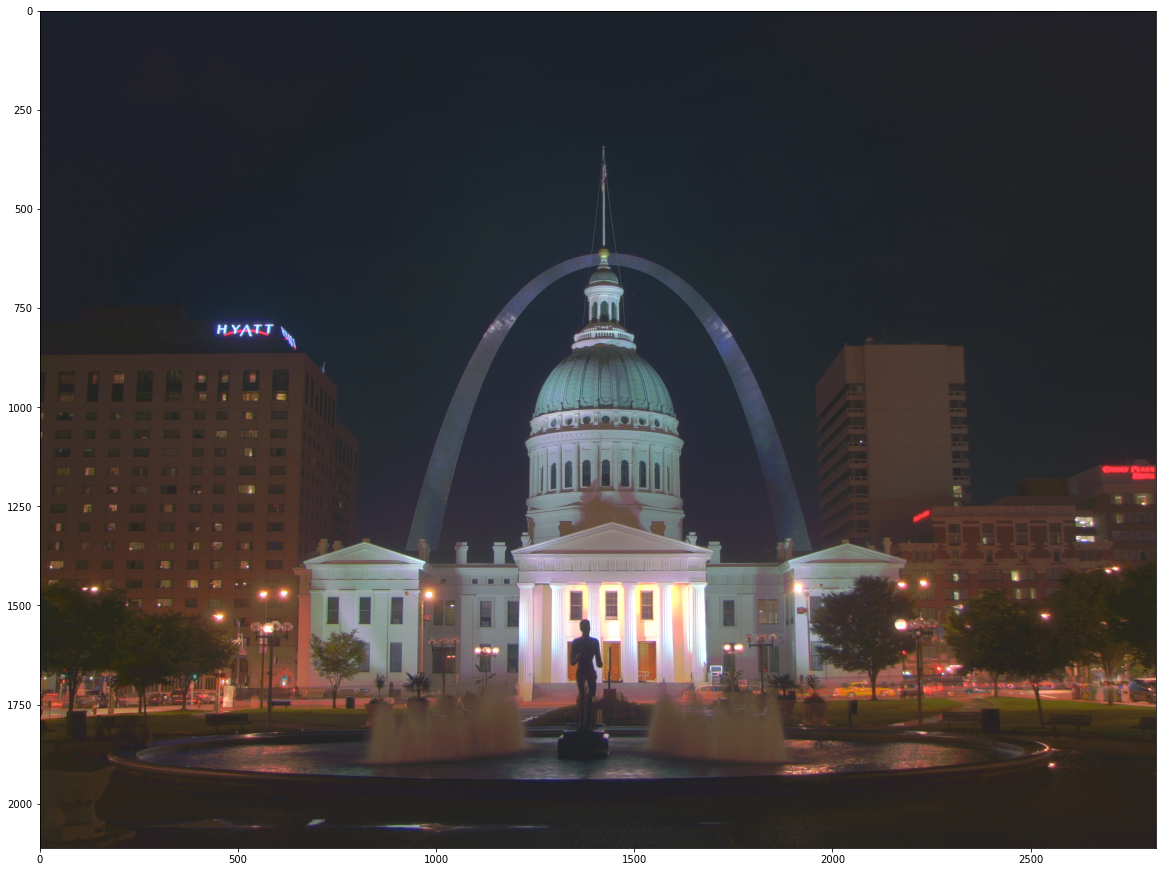

In [62]:
tonemapMantiuk = cv2.createTonemapMantiuk(2.2,0.85,1.2)
ldrMantiuk = tonemapMantiuk.process(hdrDebevec)
ldrMantiuk = np.clip(3*ldrMantiuk,0,1)
plt.imshow(ldrMantiuk[...,::-1])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Mantiuk')

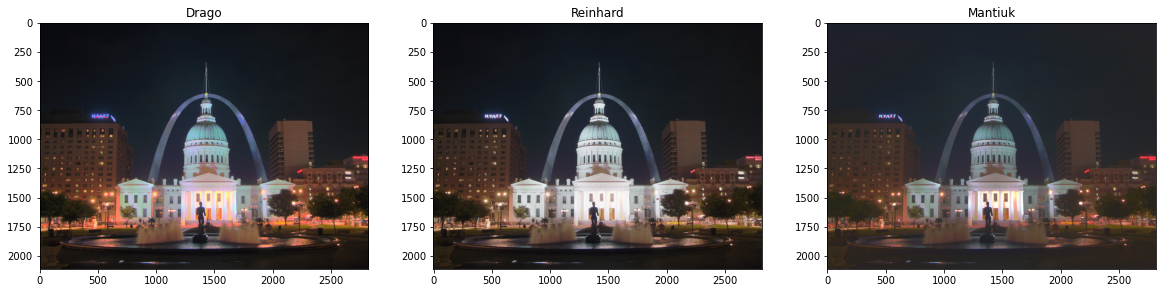

In [63]:
plt.figure(figsize=[20,20])
plt.subplot(131);plt.imshow(ldrDrago[...,::-1]);plt.title("Drago")
plt.subplot(132);plt.imshow(ldrReinhard[...,::-1]);plt.title("Reinhard")
plt.subplot(133);plt.imshow(ldrMantiuk[...,::-1]);plt.title("Mantiuk")